In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from tqdm import tqdm
from scipy.ndimage import gaussian_filter1d
from skimage.morphology import binary_opening, binary_closing, binary_opening

In [2]:
NOTEBOOK_DIR = os.getcwd()
MODULE_DIR, _ = os.path.split(NOTEBOOK_DIR)
sys.path.append(MODULE_DIR)

In [3]:
from longterm import load, utils
from longterm.utils import list_attr, list_fn, list_mthd
from longterm import analysis as an
from longterm.behaviour import synchronisation as sync
from longterm import plot as myplt
from longterm import rois
from longterm.behaviour import optic_flow as of
from longterm.analysis import InterPCAAnalysis, InterPCAAnalysisFromFile

In [11]:
an = reload(an)

In [12]:
fly_dir = "/mnt/NAS2/LH/210618/fly5"
all_i_trials = [2,6,7,8,9,10]
condition = "18.06. caff"
compare_i_trials = [2,6,20]
thres_rest = 0.01
thres_walk = 0.025

trial_names = ["before 2", "after 1", "after 2", "after 3", "after 4", "after 5"]

In [13]:
pcan = an.InterPCAAnalysis(fly_dir=fly_dir, 
                                 i_trials=all_i_trials, 
                                 condition=condition, 
                                 compare_i_trials=compare_i_trials, 
                                 thres_walk=thres_walk, 
                                 thres_rest=thres_rest,
                                 load_df=True, 
                                 load_pixels=False, 
                                 pixel_shape=None, 
                                 sigma=1, # 0  # 1  # 3 
                                 trial_names=trial_names,
                                 twop_df_name="twop_df.pkl")

Read the centers of 82 ROIs from file


In [15]:
pcan.sort_neurons()
w = pcan.get_w_inter_pca_walk_rest_neurons()
pcan.get_covs_walk_rest_neurons()
pcan.get_covs_inter_trial_neurons()
pcan.get_inter_pca_trials_neurons()
# pcan.get_inter_condition_variance_ratios_neurons()

<IPython.core.display.Javascript object>


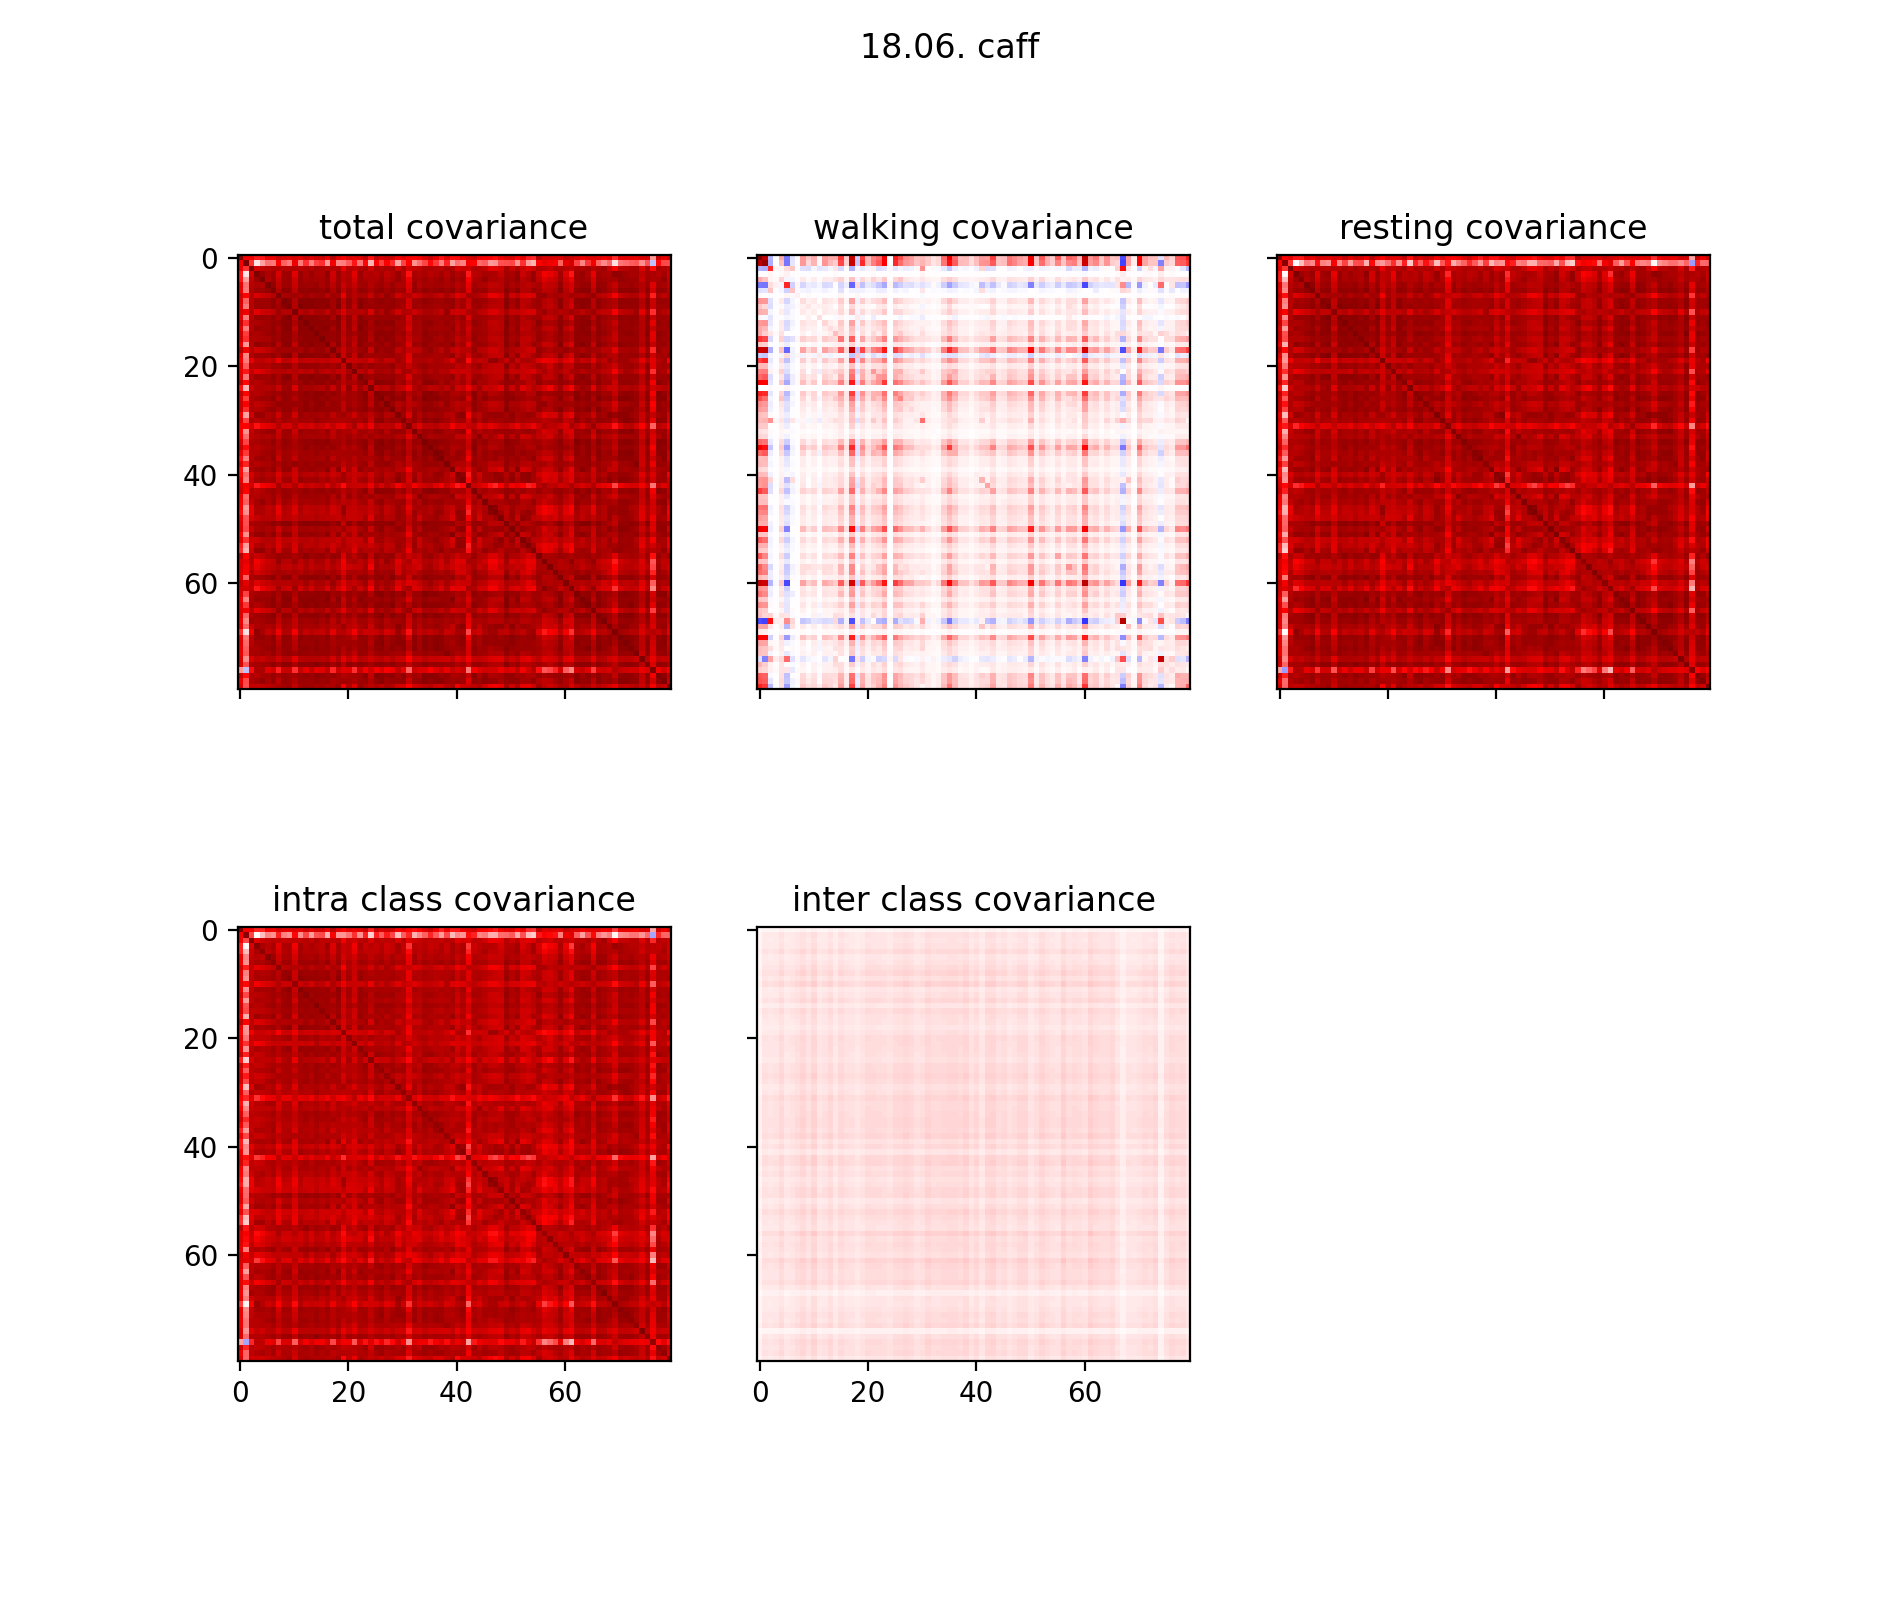

Text(0.5, 0.98, '18.06. caff')

In [16]:
%matplotlib notebook

fig, axs = plt.subplots(2,3,figsize=(9.5, 8), sharex=True, sharey=True)
clim = [np.quantile(pcan.cov_neurons, 0.01), np.quantile(pcan.cov_neurons, 0.99)]
clim = [-1,1]
axs[0,0].imshow(pcan.cov_neurons, clim=clim, cmap=plt.cm.get_cmap("seismic"))
axs[0,0].set_title("total covariance")
axs[0,1].imshow(pcan.cov_neurons_walk, clim=clim, cmap=plt.cm.get_cmap("seismic"))
axs[0,1].set_title("walking covariance")
axs[0,2].imshow(pcan.cov_neurons_rest, clim=clim, cmap=plt.cm.get_cmap("seismic"))
axs[0,2].set_title("resting covariance")
axs[1,0].imshow(pcan.cov_neurons_rest_walk_intra, clim=clim, cmap=plt.cm.get_cmap("seismic"))
axs[1,0].set_title("intra class covariance")
axs[1,1].imshow(pcan.cov_neurons_rest_walk_inter, clim=clim, cmap=plt.cm.get_cmap("seismic"))
axs[1,1].set_title("inter class covariance")
axs[1,2].axis("off")
fig.suptitle(pcan.condition)

<IPython.core.display.Javascript object>


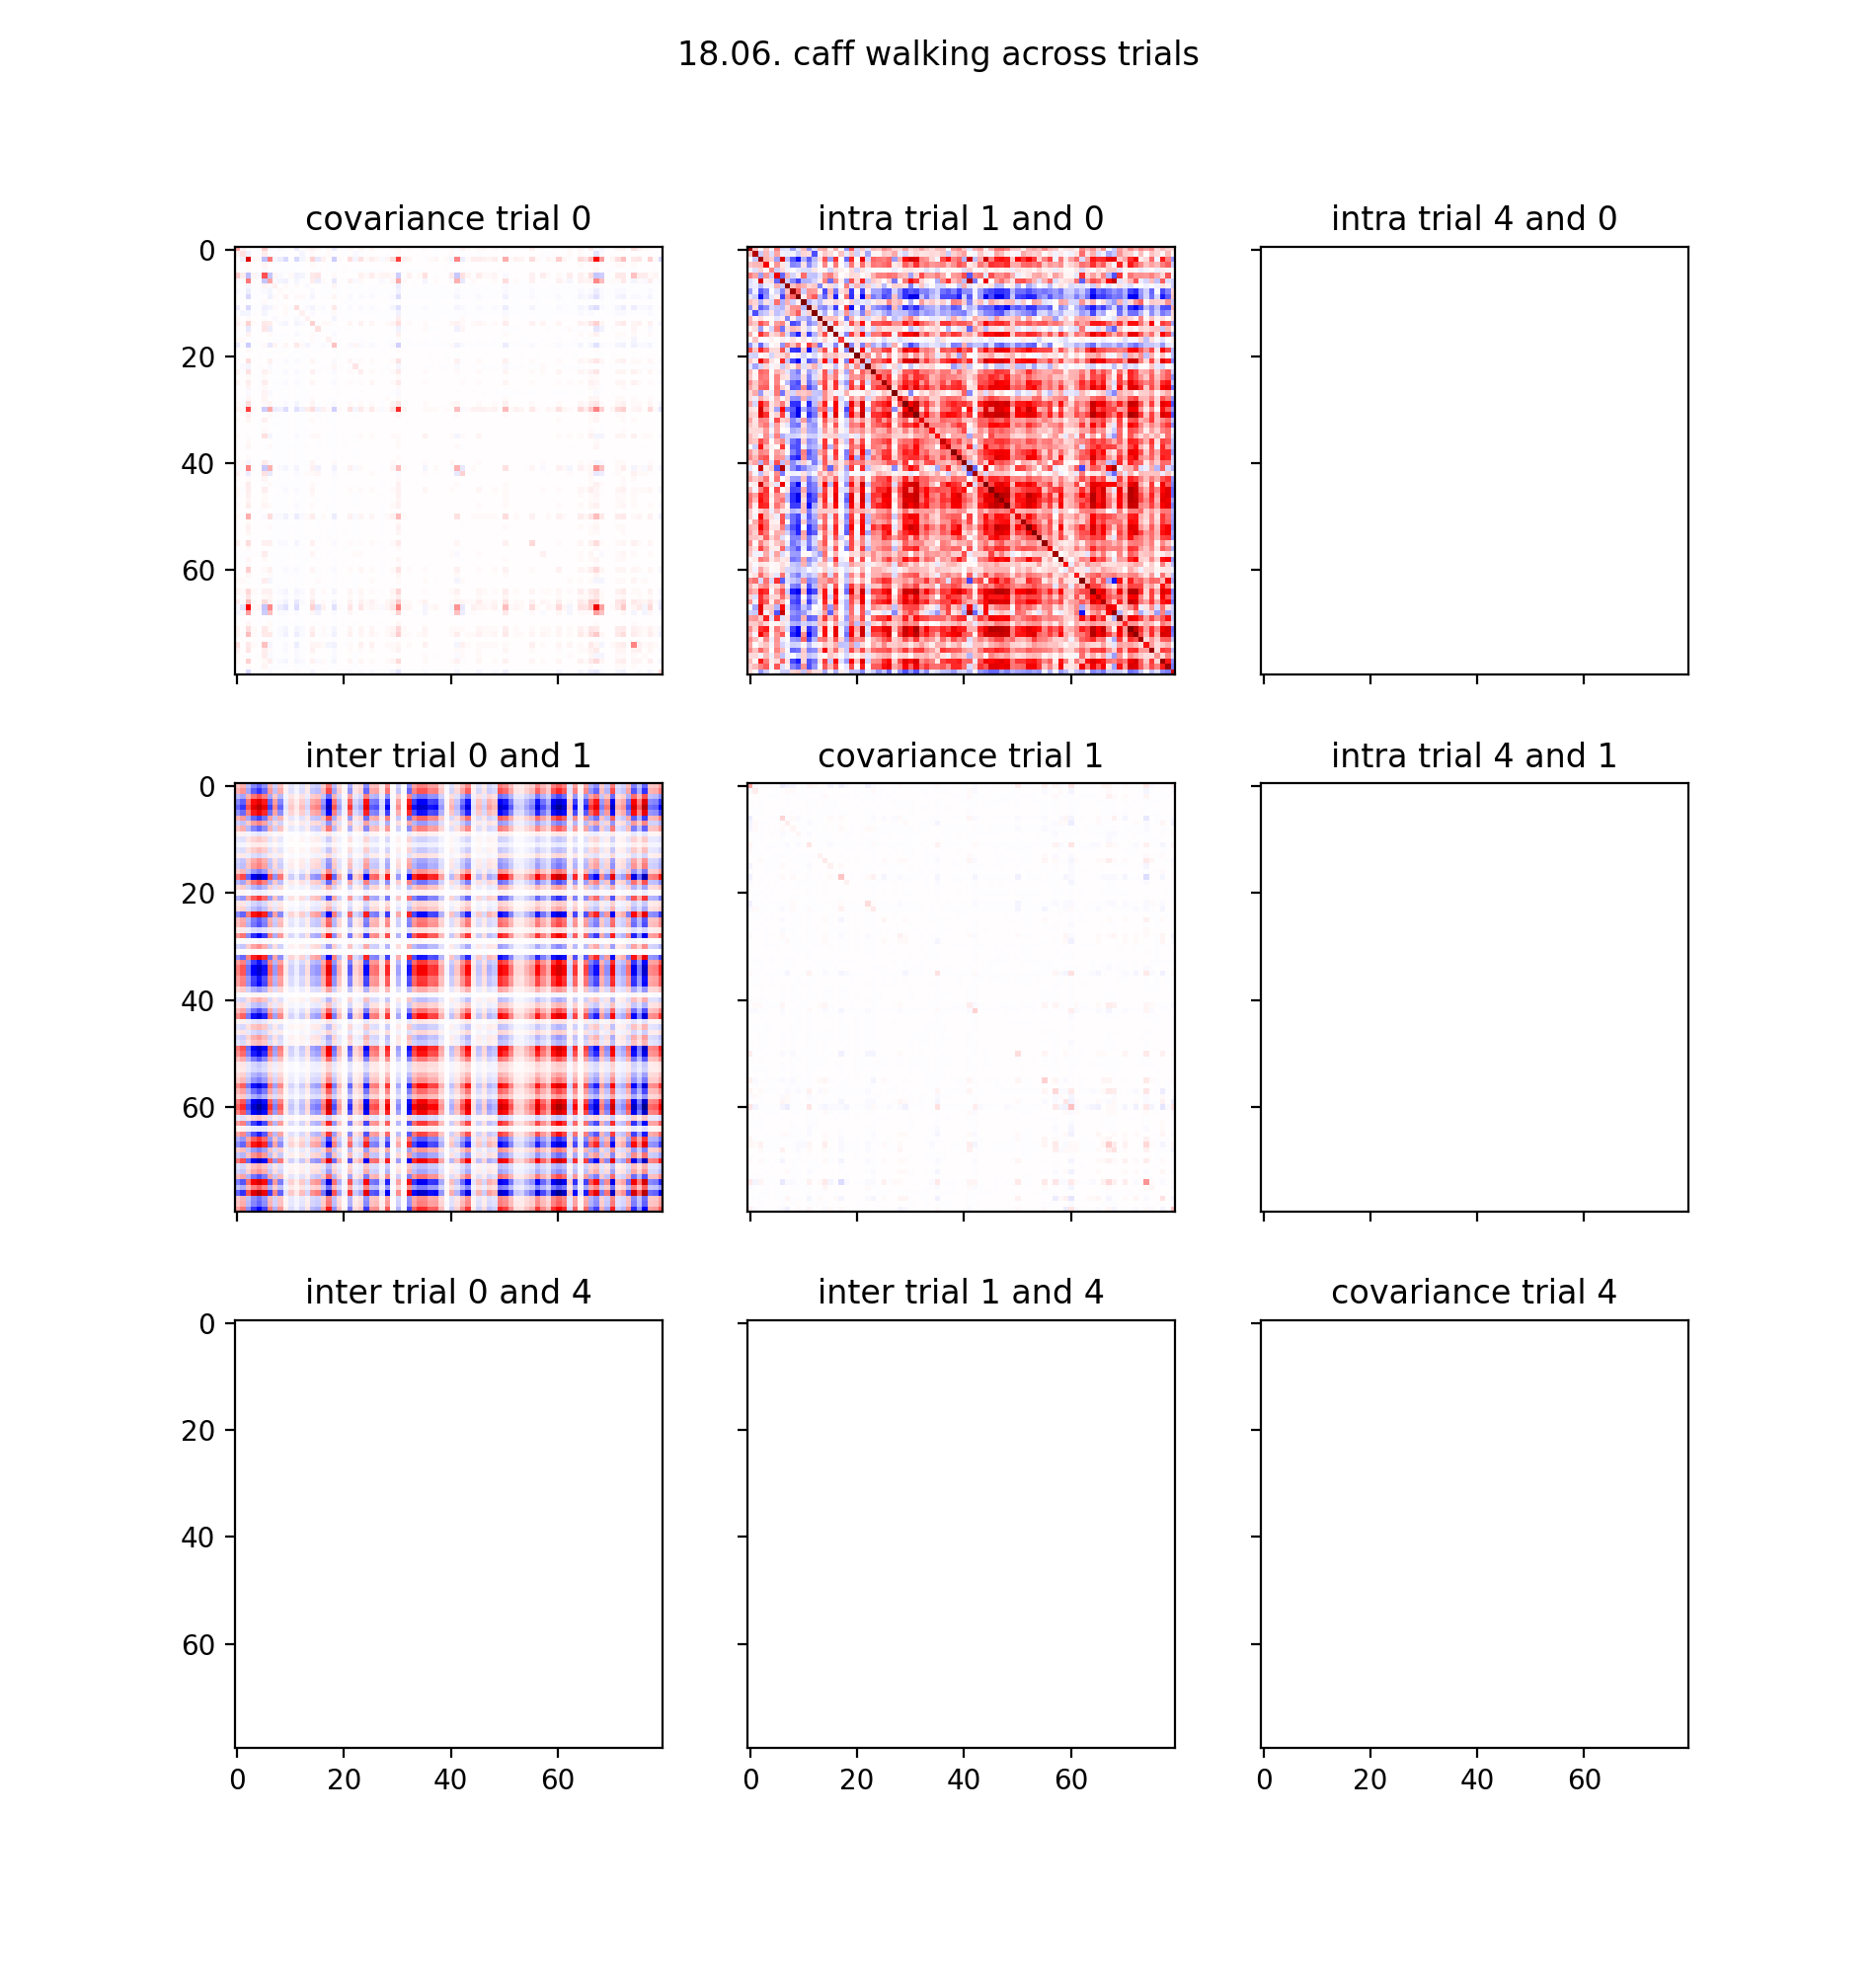

In [18]:
%matplotlib notebook
an.plot_cov_matrix(pcan.cov_neurons_matrix_walk, trials=[0,1,4], clim=[-1,1], name=pcan.condition+" walking across trials")

<IPython.core.display.Javascript object>


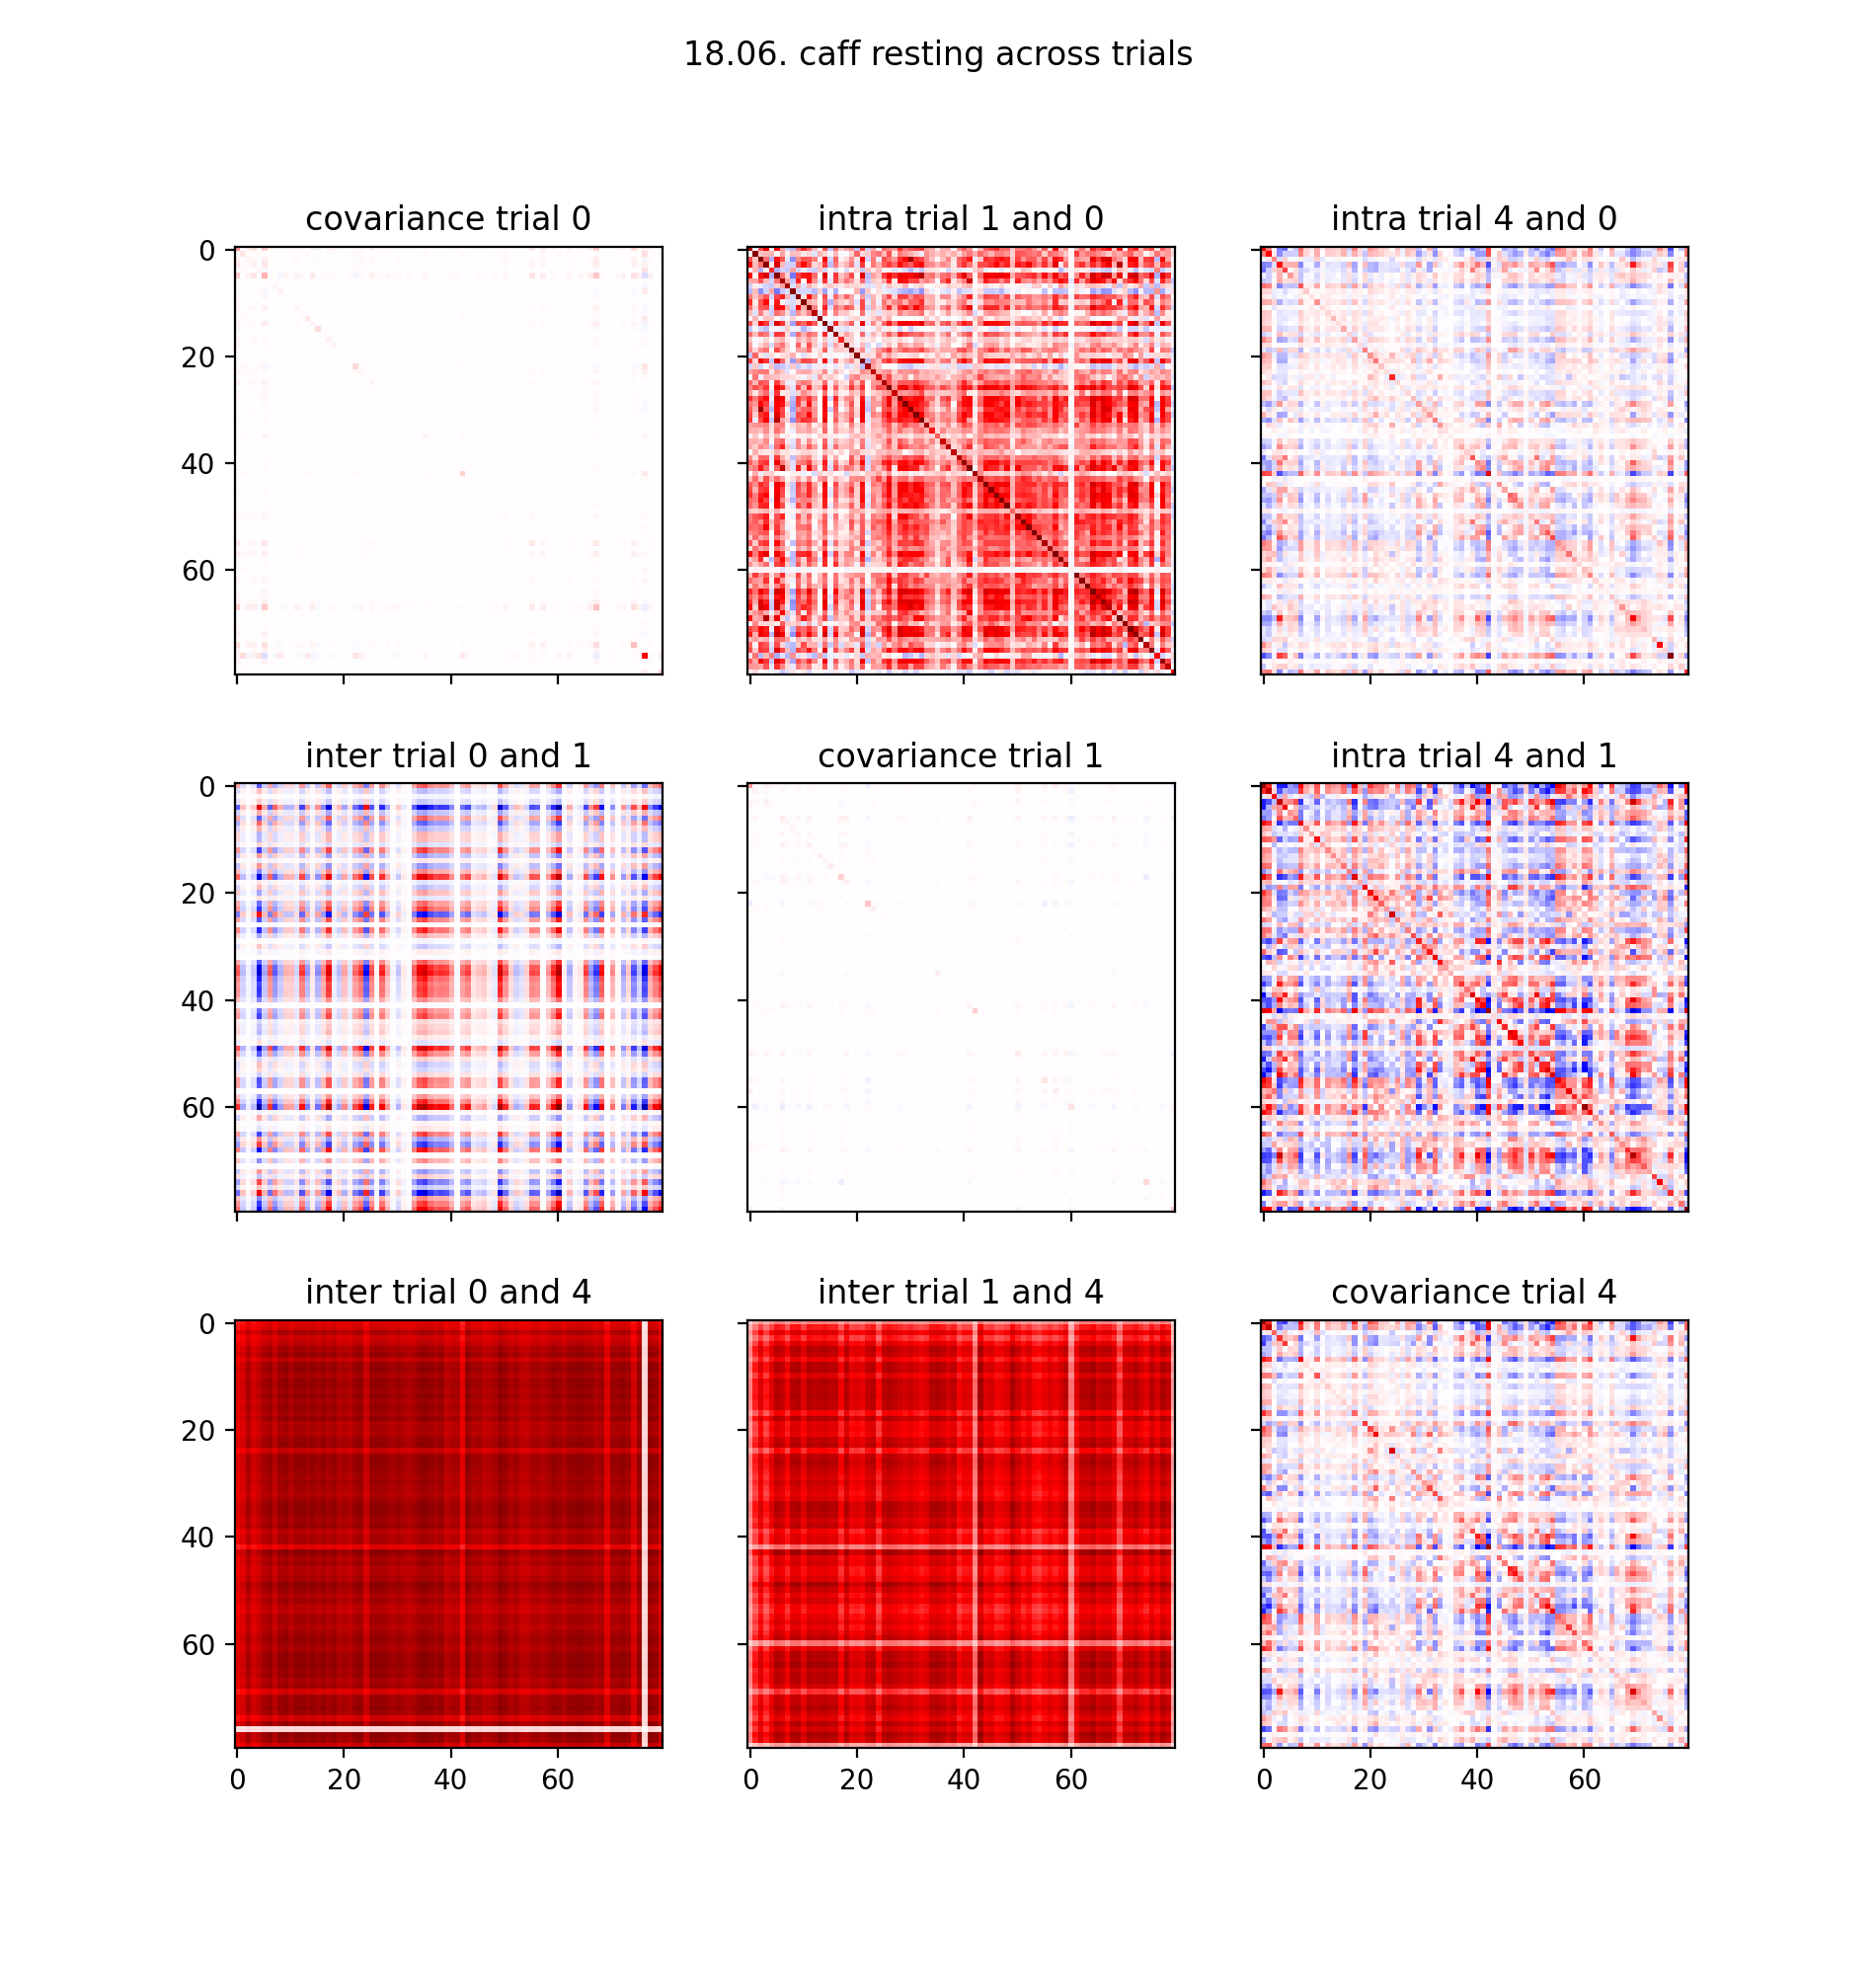

In [19]:
%matplotlib notebook
an.plot_cov_matrix(pcan.cov_neurons_matrix_rest, trials=[0,1,4], clim=[-1,1], name=pcan.condition+" resting across trials")

<IPython.core.display.Javascript object>


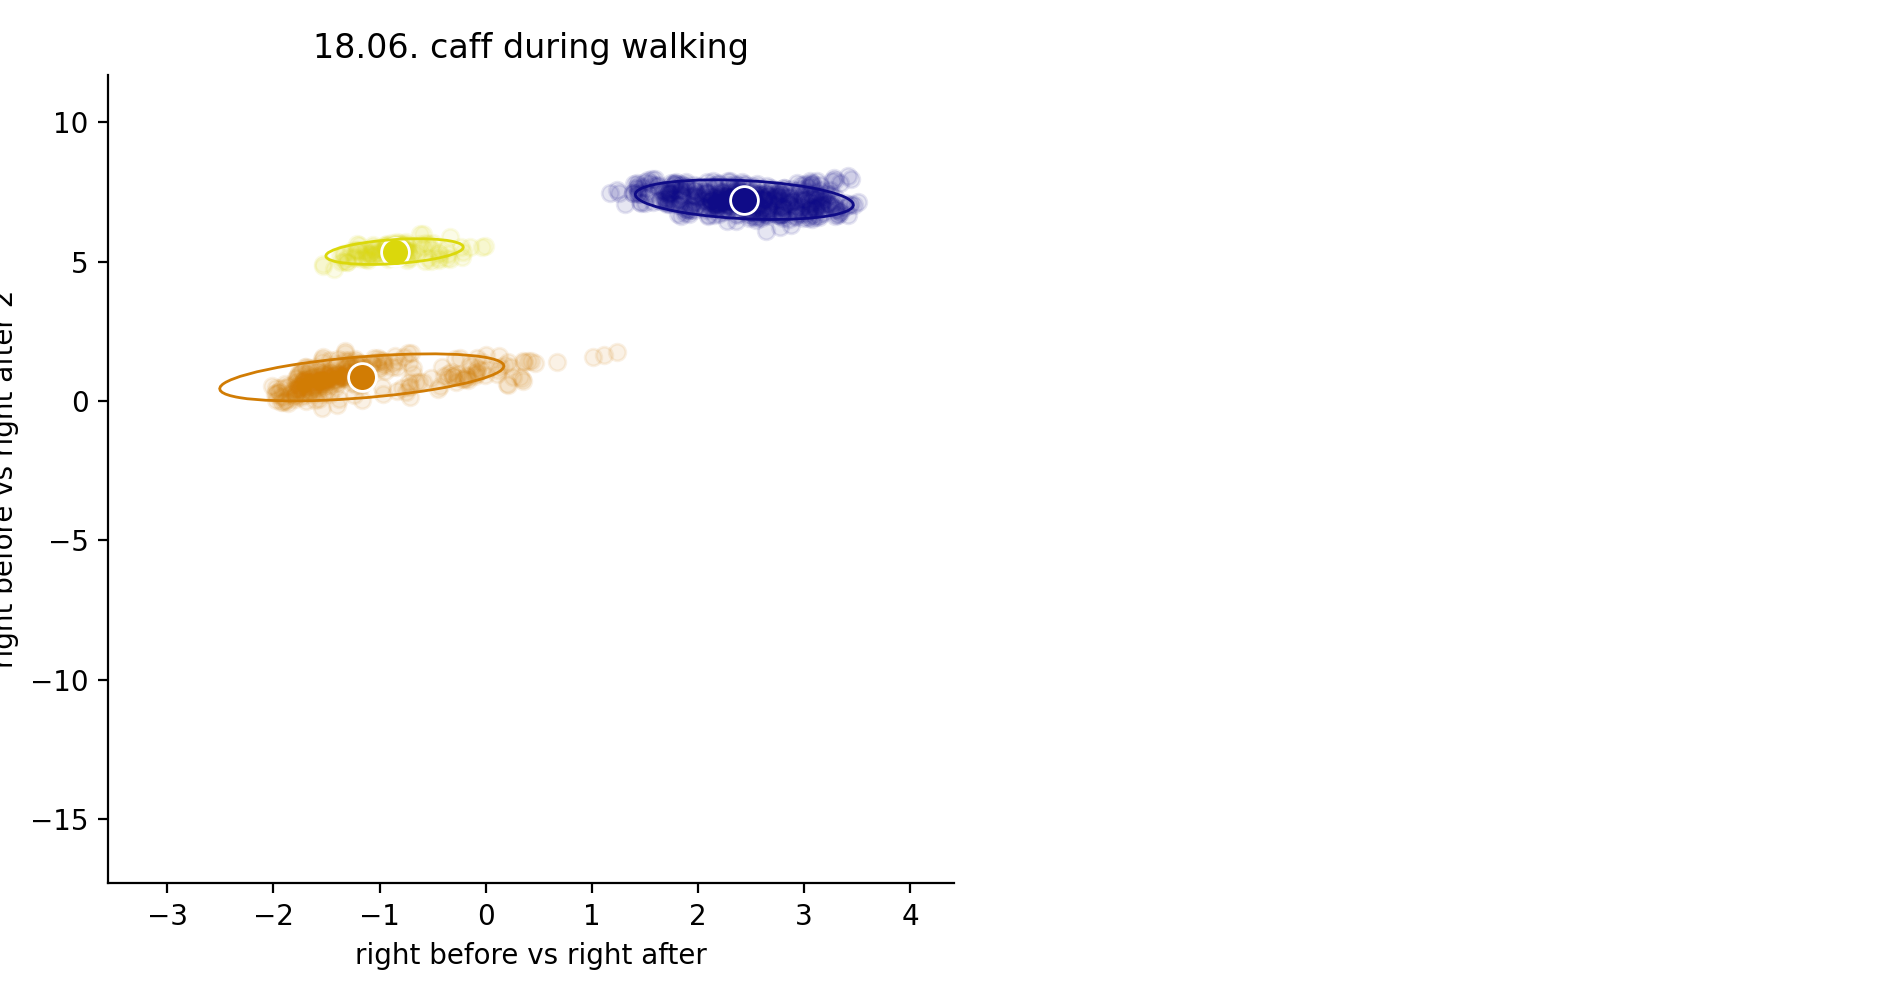

could not apply tight layout.


In [36]:
%matplotlib notebook

# colors_long = [myplt.BLACK, myplt.DARKBLUE, myplt.DARKGREEN, myplt.DARKYELLOW, myplt.DARKORANGE, myplt.DARKRED]
# colors_contrast_long = [myplt.DARKGRAY, myplt.DARKBLUE_CONTRAST, myplt.DARKGREEN_CONTRAST, myplt.DARKPINK, myplt.DARKPURPLE, myplt.DARKBROWN]
colors_long = [myplt.DARKBLUE,  # myplt.DARKBLUE_CONTRAST, myplt.DARKGREEN, # myplt.DARKGREEN_CONTRAST, 
          myplt.DARKYELLOW, myplt.DARKORANGE,myplt.DARKPINK, myplt.DARKRED, myplt.DARKPURPLE]
colors_contrast_long = colors_long
# colors = [myplt.DARKBLUE, myplt.DARKYELLOW, myplt.DARKRED]
# colors_contrast = [myplt.DARKBLUE_CONTRAST,myplt.DARKPINK, myplt.DARKBROWN]
# order = [0,4,1,5,2,3]

fig, axs = plt.subplots(1,2, figsize=(9.5,5), sharey=True, sharex=True)  # , sharex="col", sharey="col")

short_bef = 0
right_aft = 1
right_aft_2 = 2
long_aft = 4


an.plot_proj_scatter(w_1=pcan.w_inter_pca_rest_neurons[short_bef,right_aft], w_2=pcan.w_inter_pca_rest_neurons[short_bef,long_aft],
             X_trials=pcan.neurons_rest, trials=[0,1,2,3,4,5], w_names=["right before vs right after", "right before vs long after"],
             X_names=pcan.trial_names, 
             fig=fig, ax=axs[1], alpha=0.1, name=pcan.condition+" during resting",colors=colors_contrast_long)

an.plot_proj_scatter(w_1=pcan.w_inter_pca_walk_neurons[short_bef,right_aft], w_2=pcan.w_inter_pca_walk_neurons[short_bef,right_aft_2],
             X_trials=pcan.neurons_walk, trials=[0,1,2,3,4,5], w_names=["right before vs right after", "right before vs right after 2"],
             X_names=pcan.trial_names, 
             fig=fig, ax=axs[0], alpha=0.1, name=pcan.condition+" during walking",colors=colors_long)

# fig.suptitle("Inter Condition PCA")
# fig.tight_layout()

In [28]:
frac_rest = [np.mean(r) for r in pcan.rest]
frac_rest

[0.6536458333333334,
 0.13385416666666666,
 0.25026041666666665,
 0.9375,
 0.9822916666666667,
 0.99296875]

In [29]:
frac_walk = [np.mean(r) for r in pcan.walk]
frac_walk

[0.12578125, 0.029427083333333333, 0.07682291666666667, 0.0, 0.0, 0.0]